In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import data_info, load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_a4a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

In [2]:
C = 0.5
# sgd_steps = (1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001)
sgd_steps = tuple(np.round(np.geomspace(0.005, 1, 11), 3))
# sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01)
sgdd_steps = tuple(np.round(np.geomspace(0.01, 1, 11), 3))
# momentum_steps = (0.9, 0.99)
# sls_steps = (1, 0.5, 0.1, 0.05, 0.01)
sls_steps = tuple(np.round(np.geomspace(0.01, 1, 7), 3))
armijo_damps = (0.3, 0.5, 0.7)
momentum_damps = (0.3, 0.5, 0.7)

print(f"""Fixed: {sgd_steps}
Decreasing: {sgdd_steps}
SLS: {sls_steps}
delta_a: {armijo_damps}
delta_m: {momentum_damps}""")

Fixed: (0.005, 0.008, 0.014, 0.025, 0.042, 0.071, 0.12, 0.204, 0.347, 0.589, 1.0)
Decreasing: (0.01, 0.016, 0.025, 0.04, 0.063, 0.1, 0.158, 0.251, 0.398, 0.631, 1.0)
SLS: (0.01, 0.022, 0.046, 0.1, 0.215, 0.464, 1.0)
delta_a: (0.3, 0.5, 0.7)
delta_m: (0.3, 0.5, 0.7)


# w1a

In [3]:
data_w1a = load_w1a()
data_info(data_w1a)

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Train distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}
Test distribution: {-1.0: 0.9702360805550855, 1.0: 0.029763919444914536}


In [4]:
Mw1a_grid = (32, 64)
for i in Mw1a_grid:
    print(f"Iterations: {data_w1a[1].size / i}")

Iterations: 77.40625
Iterations: 38.703125


## Benchmark

In [5]:
benchw1a = run_bench(data_w1a, C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [6]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, data_w1a, (data_w1a[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 1.507155
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.005181
Epochs: 12


In [7]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, data_w1a, Mw1a_grid, sgd_steps, n_jobs=7)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, data_w1a, Mw1a_grid, sgdd_steps, n_jobs=7)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, data_w1a, Mw1a_grid, sgd_steps, n_jobs=7)

{'batch': 32, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 12.173558
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000879
Sol norm: 0.667293
Run-time (seconds): 0.208880
Epochs: 27
% ----- %
{'batch': 32, 'alpha': 0.1, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 4.841146
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000890
Sol norm: 0.667605
Run-time (seconds): 0.099983
Epochs: 14
% ----- %
{'batch': 32, 'alpha': 0.042, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 10.569704
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000973
Sol norm: 0.666975
Run-time (seconds): 1.056778
Epochs: 108


In [8]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=9)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=9)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=9)

{'batch': 64, 'alpha': 0.01, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 31.637151
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000857
Sol norm: 0.667250
Run-time (seconds): 0.411083
Epochs: 42
% ------ %
{'batch': 32, 'alpha': 0.022, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.7}
Grid search run-time (seconds): 85.893571
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667133
Run-time (seconds): 0.697225
Epochs: 44
% ------ %
{'batch': 64, 'alpha': 0.046, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 29.764816
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000961
Sol norm: 0.667560
Run-time (seconds): 1.946557
Epochs: 183


In [9]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.5,0.5,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.5,0.5,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.5,0.5,0.667406
3,SGD-Fixed,0.5,2477.0,1.000,0.0,0.464614,0.000564,0.005181,12,0.970933,0.970236,0.5,0.5,0.667389
5,SGD-Decreasing,0.5,32.0,0.100,0.0,0.464614,0.000890,0.099983,14,0.970933,0.970236,0.5,0.5,0.667605
8,MSL-SGDM-C,0.5,32.0,0.022,0.9,0.464615,0.000852,0.697225,44,0.970933,0.970236,0.5,0.5,0.667133
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.464615,0.000857,0.411083,42,0.970933,0.970236,0.5,0.5,0.667250
4,SGD-Fixed,0.5,32.0,0.008,0.0,0.464615,0.000879,0.208880,27,0.970933,0.970236,0.5,0.5,0.667293
6,SGDM,0.5,32.0,0.042,0.9,0.464615,0.000973,1.056778,108,0.970933,0.970236,0.5,0.5,0.666975
9,MSL-SGDM-R,0.5,64.0,0.046,0.9,0.464615,0.000961,1.946557,183,0.970933,0.970236,0.5,0.5,0.667560


In [10]:
print(test_w1a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & 6 & NaN & 0.667394 & 0.464614 & 0.000046 & 0.970236 \\
CG & 7 & NaN & 0.667395 & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & 7 & NaN & 0.667406 & 0.464614 & 0.000023 & 0.970236 \\
SGD-Fixed & 12 & 0.005181 & 0.667389 & 0.464614 & 0.000564 & 0.970236 \\
SGD-Decreasing & 14 & 0.099983 & 0.667605 & 0.464614 & 0.000890 & 0.970236 \\
MSL-SGDM-C & 44 & 0.697225 & 0.667133 & 0.464615 & 0.000852 & 0.970236 \\
SGD-Armijo & 42 & 0.411083 & 0.667250 & 0.464615 & 0.000857 & 0.970236 \\
SGD-Fixed & 27 & 0.208880 & 0.667293 & 0.464615 & 0.000879 & 0.970236 \\
SGDM & 108 & 1.056778 & 0.666975 & 0.464615 & 0.000973 & 0.970236 \\
MSL-SGDM-R & 183 & 1.946557 & 0.667560 & 0.464615 & 0.000961 & 0.970236 \\
\bottomrule
\end{tabular}



## SGD

In [11]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, (data_w1a[1].size,))

Grid search run-time (seconds): 2.811637


In [12]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, Mw1a_grid)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, data_w1a, Mw1a_grid)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, data_w1a, Mw1a_grid)

Grid search run-time (seconds): 4.095685
Grid search run-time (seconds): 4.039667
Grid search run-time (seconds): 4.054181


In [13]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, data_w1a, Mw1a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, data_w1a, Mw1a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, data_w1a, Mw1a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 13.856541
Grid search run-time (seconds): 20.511882
Grid search run-time (seconds): 15.523032


In [14]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [15]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,6.014267e-16,0.091477,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.464614,3.409068e-05,0.654554,200,0.970933,0.970236,0.500000,0.500000,0.667384
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.085996,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.464614,1.351881e-04,0.655403,200,0.970933,0.970236,0.500000,0.500000,0.667380
20,MSL-SGDM-C,0.5,64.0,0.01,0.9,0.464614,3.254910e-04,1.163851,200,0.970933,0.970236,0.500000,0.500000,0.667216
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.464614,3.245760e-04,0.638266,200,0.970933,0.970236,0.500000,0.500000,0.667402
17,SGD-Armijo,0.5,64.0,0.01,0.0,0.464614,3.245760e-04,0.896978,200,0.970933,0.970236,0.500000,0.500000,0.667402


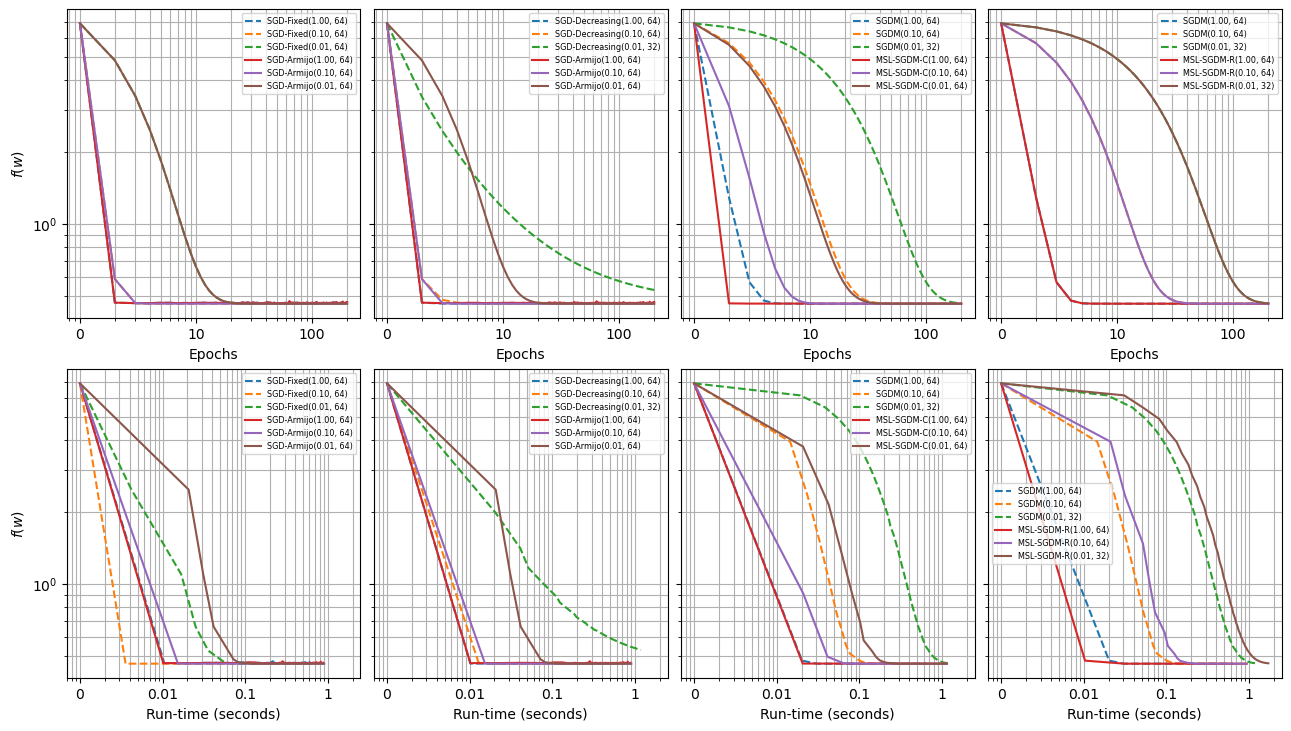

In [16]:
diagnostic([sgdfixed_w1a, sgddecre_w1a, sgdm_w1a, sgdarmijo_w1a, mslc_w1a, mslr_w1a])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [17]:
data_w3a = load_w3a()
data_info(data_w3a)

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Train distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}
Test distribution: {-1.0: 0.9702031804090372, 1.0: 0.029796819590962823}


In [18]:
Mw3a_grid = (64, 128)
for i in Mw3a_grid:
    print(f"Iterations: {data_w3a[1].size / i}")

Iterations: 76.75
Iterations: 38.375


## Benchmark

In [19]:
benchw3a = run_bench(data_w3a, C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [20]:
batchfixed_w3a1, _ = grid_search("SGD-Fixed", C, data_w3a, (data_w3a[1].size,), sgd_steps)

{'batch': 4912, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.622184
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462742
Grad norm: 0.000564
Sol norm: 0.666635
Run-time (seconds): 0.011878
Epochs: 12


In [21]:
sgdfixed_w3a1, _ = grid_search("SGD-Fixed", C, data_w3a, Mw3a_grid, sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search("SGD-Decreasing", C, data_w3a, Mw3a_grid, sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search("SGDM", C, data_w3a, Mw3a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 18.084228
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000800
Sol norm: 0.666732
Run-time (seconds): 0.304730
Epochs: 27
% ----- %
{'batch': 128, 'alpha': 0.251, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 11.437508
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.9702031804090372
Objective function: 0.462742
Grad norm: 0.000683
Sol norm: 0.666611
Run-time (seconds): 0.136348
Epochs: 12
% ----- %
{'batch': 128, 'alpha': 0.071, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 20.305481
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000979
Sol norm: 0.666398
Run-time (seconds): 1.206646
Epochs: 115


In [22]:
sgdarmijo_w3a1, _ = grid_search("SGD-Armijo", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ----- %")
mslc_w3a1, _ = grid_search("MSL-SGDM-C", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_w3a1, _ = grid_search("MSL-SGDM-R", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 128, 'alpha': 0.022, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 52.453499
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000826
Sol norm: 0.666507
Run-time (seconds): 0.382958
Epochs: 20
% ----- %
{'batch': 128, 'alpha': 0.046, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.5}
Grid search run-time (seconds): 136.053316
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000864
Sol norm: 0.666984
Run-time (seconds): 0.387928
Epochs: 26
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 56.840355
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000895
Sol norm: 0.666594
Run-time (seconds): 1.400920
Epochs: 45


In [23]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.5,0.5,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.5,0.5,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.5,0.5,0.666658
3,SGD-Fixed,0.5,4912.0,1.000,0.0,0.462742,0.000564,0.011878,12,0.970888,0.970203,0.5,0.5,0.666635
5,SGD-Decreasing,0.5,128.0,0.251,0.0,0.462742,0.000683,0.136348,12,0.970888,0.970203,0.5,0.5,0.666611
4,SGD-Fixed,0.5,64.0,0.008,0.0,0.462743,0.000800,0.304730,27,0.970888,0.970203,0.5,0.5,0.666732
7,SGD-Armijo,0.5,128.0,0.022,0.0,0.462743,0.000826,0.382958,20,0.970888,0.970203,0.5,0.5,0.666507
8,MSL-SGDM-C,0.5,128.0,0.046,0.9,0.462743,0.000864,0.387928,26,0.970888,0.970203,0.5,0.5,0.666984
9,MSL-SGDM-R,0.5,64.0,0.100,0.9,0.462743,0.000895,1.400920,45,0.970888,0.970203,0.5,0.5,0.666594
6,SGDM,0.5,128.0,0.071,0.9,0.462743,0.000979,1.206646,115,0.970888,0.970203,0.5,0.5,0.666398


In [24]:
print(test_w3a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & 6 & NaN & 0.666640 & 0.462742 & 0.000011 & 0.970203 \\
CG & 7 & NaN & 0.666648 & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & 7 & NaN & 0.666658 & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 12 & 0.011878 & 0.666635 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Decreasing & 12 & 0.136348 & 0.666611 & 0.462742 & 0.000683 & 0.970203 \\
SGD-Fixed & 27 & 0.304730 & 0.666732 & 0.462743 & 0.000800 & 0.970203 \\
SGD-Armijo & 20 & 0.382958 & 0.666507 & 0.462743 & 0.000826 & 0.970203 \\
MSL-SGDM-C & 26 & 0.387928 & 0.666984 & 0.462743 & 0.000864 & 0.970203 \\
MSL-SGDM-R & 45 & 1.400920 & 0.666594 & 0.462743 & 0.000895 & 0.970203 \\
SGDM & 115 & 1.206646 & 0.666398 & 0.462743 & 0.000979 & 0.970203 \\
\bottomrule
\end{tabular}



## SGD

In [25]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, (data_w3a[1].size,))

Grid search run-time (seconds): 3.931872


In [26]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, Mw3a_grid)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, data_w3a, Mw3a_grid)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, data_w3a, Mw3a_grid)

Grid search run-time (seconds): 5.977715
Grid search run-time (seconds): 10.237096
Grid search run-time (seconds): 10.621611


In [27]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, data_w3a, Mw3a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, data_w3a, Mw3a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, data_w3a, Mw3a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 36.219656
Grid search run-time (seconds): 51.032102
Grid search run-time (seconds): 30.897069


In [28]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [29]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.175496,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.462742,2.245811e-05,3.319052,200,0.970888,0.970203,0.500000,0.500000,0.666654
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.462742,8.337571e-05,1.851919,200,0.970888,0.970203,0.500000,0.500000,0.666662
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.159642,200,0.970888,0.970203,0.500000,0.500000,0.666639
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.462742,1.872072e-04,2.963428,200,0.970888,0.970203,0.500000,0.500000,0.666650
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.462742,2.079663e-04,0.947036,200,0.970888,0.970203,0.500000,0.500000,0.666634
17,SGD-Armijo,0.5,128.0,0.01,0.0,0.462742,2.079663e-04,2.484674,200,0.970888,0.970203,0.500000,0.500000,0.666634


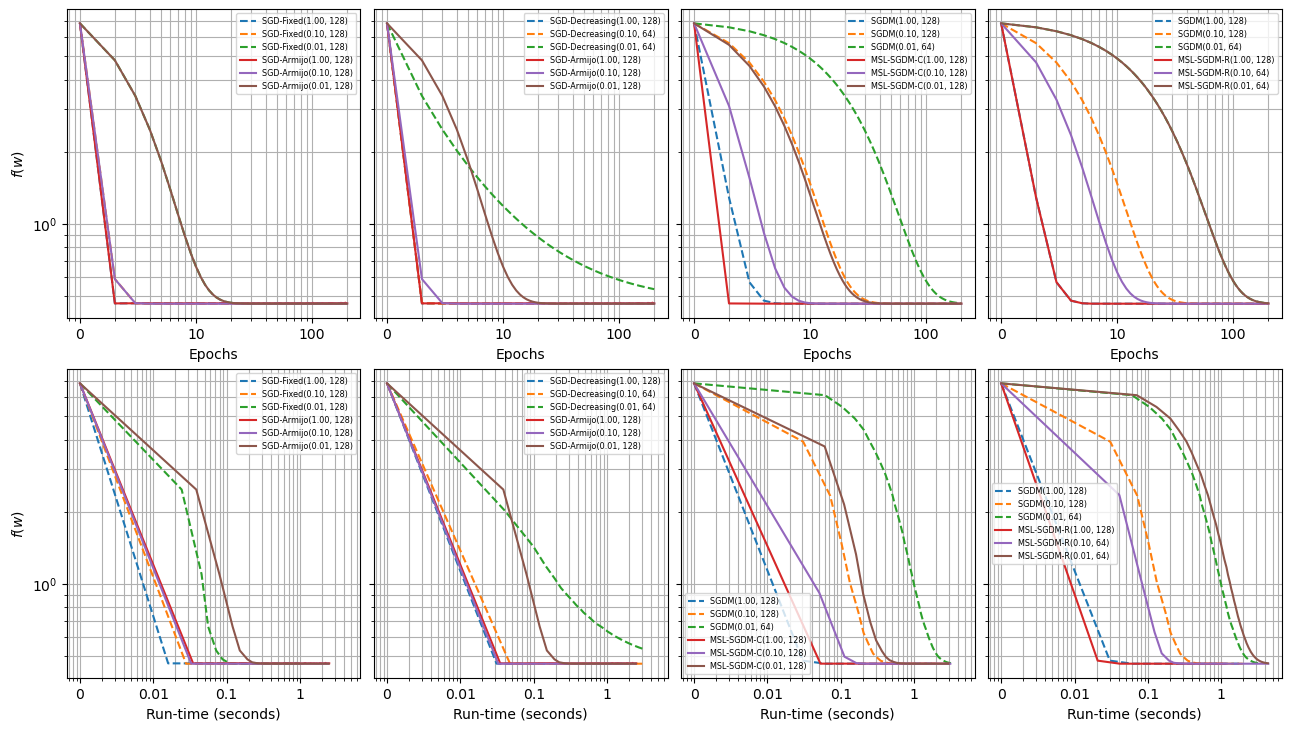

In [30]:
diagnostic([sgdfixed_w3a, sgddecre_w3a, sgdm_w3a, sgdarmijo_w3a, mslc_w3a, mslr_w3a])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [31]:
data_phish = load_phishing()
data_info(data_phish)

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Train distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}
Test distribution: {-1: 0.4323835368611488, 1: 0.5676164631388512}


In [32]:
Mphish_grid = (64, 128)
for i in Mphish_grid:
    print(f"Iterations: {data_phish[1].size / i}")

Iterations: 138.1875
Iterations: 69.09375


## Benchmark

In [33]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [34]:
batchfixed_phish1, _ = grid_search("SGD-Fixed", C, data_phish, (data_phish[1].size,), sgd_steps)

{'batch': 8844, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 3.826142
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.041197
Epochs: 11


In [35]:
sgdfixed_phish1, _ = grid_search("SGD-Fixed", C, data_phish, Mphish_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_phish1, _ = grid_search("SGD-Decreasing", C, data_phish, Mphish_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_phish1, _ = grid_search("SGDM", C, data_phish, Mphish_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 25.215248
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000445
Sol norm: 0.164222
Run-time (seconds): 0.276858
Epochs: 15
% ----- %
{'batch': 64, 'alpha': 0.251, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 18.304912
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000491
Sol norm: 0.164462
Run-time (seconds): 0.909464
Epochs: 27
% ----- %
{'batch': 128, 'alpha': 0.12, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 19.886345
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000552
Sol norm: 0.164371
Run-time (seconds): 0.765451
Epochs: 41


In [36]:
sgdarmijo_phish1, _ = grid_search("SGD-Armijo", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ----- %")
mslc_phish1, _ = grid_search("MSL-SGDM-C", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_phish1, _ = grid_search("MSL-SGDM-R", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 64, 'alpha': 0.01, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 78.161499
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000927
Sol norm: 0.163727
Run-time (seconds): 0.600832
Epochs: 13
% ----- %
{'batch': 128, 'alpha': 0.022, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.7}
Grid search run-time (seconds): 196.181765
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000445
Sol norm: 0.163895
Run-time (seconds): 2.147344
Epochs: 47
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 58.575040
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000670
Sol norm: 0.163704
Run-time (seconds): 1.333998
Epochs: 48


In [37]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.5,0.5,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.5,0.5,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.5,0.5,0.164214
8,MSL-SGDM-C,0.5,128.0,0.022,0.9,0.685065,4.446200e-04,2.147344,47,0.554274,0.567616,0.5,0.5,0.163895
4,SGD-Fixed,0.5,64.0,0.008,0.0,0.685065,4.450432e-04,0.276858,15,0.554274,0.567616,0.5,0.5,0.164222
5,SGD-Decreasing,0.5,64.0,0.251,0.0,0.685065,4.912512e-04,0.909464,27,0.554274,0.567616,0.5,0.5,0.164462
6,SGDM,0.5,128.0,0.120,0.9,0.685065,5.520440e-04,0.765451,41,0.554274,0.567616,0.5,0.5,0.164371
3,SGD-Fixed,0.5,8844.0,1.000,0.0,0.685065,5.343408e-04,0.041197,11,0.554274,0.567616,0.5,0.5,0.164001
9,MSL-SGDM-R,0.5,128.0,0.100,0.9,0.685065,6.698999e-04,1.333998,48,0.554274,0.567616,0.5,0.5,0.163704
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.685065,9.272841e-04,0.600832,13,0.554274,0.567616,0.5,0.5,0.163727


In [38]:
print(test_phish[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & 5 & NaN & 0.164188 & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & 5 & NaN & 0.164196 & 0.685065 & 0.000008 & 0.567616 \\
CG & 6 & NaN & 0.164214 & 0.685065 & 0.000023 & 0.567616 \\
MSL-SGDM-C & 47 & 2.147344 & 0.163895 & 0.685065 & 0.000445 & 0.567616 \\
SGD-Fixed & 15 & 0.276858 & 0.164222 & 0.685065 & 0.000445 & 0.567616 \\
SGD-Decreasing & 27 & 0.909464 & 0.164462 & 0.685065 & 0.000491 & 0.567616 \\
SGDM & 41 & 0.765451 & 0.164371 & 0.685065 & 0.000552 & 0.567616 \\
SGD-Fixed & 11 & 0.041197 & 0.164001 & 0.685065 & 0.000534 & 0.567616 \\
MSL-SGDM-R & 48 & 1.333998 & 0.163704 & 0.685065 & 0.000670 & 0.567616 \\
SGD-Armijo & 13 & 0.600832 & 0.163727 & 0.685065 & 0.000927 & 0.567616 \\
\bottomrule
\end{tabular}



## SGD

In [39]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, (data_phish[1].size,))

Grid search run-time (seconds): 3.661746


In [40]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, Mphish_grid)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, Mphish_grid)
# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, Mphish_grid)

Grid search run-time (seconds): 9.841645
Grid search run-time (seconds): 17.264750
Grid search run-time (seconds): 17.067371


In [41]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, Mphish_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, Mphish_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, Mphish_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 59.418060
Grid search run-time (seconds): 62.493647
Grid search run-time (seconds): 51.344620


In [42]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [43]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
6,SGD-Fixed,0.5,128.0,1.00,0.0,0.686938,5.753181e-02,1.209236,200,0.820782,0.819539,0.799531,0.791692,0.142920
12,SGD-Armijo,0.5,128.0,1.00,0.0,0.686938,5.753181e-02,4.233299,200,0.820782,0.819539,0.799531,0.791692,0.142920
18,MSL-SGDM-C,0.5,128.0,1.00,0.9,0.685649,3.157145e-02,4.668163,200,0.555744,0.568521,0.501649,0.501046,0.149491
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.319670,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,3.108793,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.320338,200,0.554274,0.567616,0.500000,0.500000,0.164175
20,MSL-SGDM-C,0.5,64.0,0.01,0.9,0.685065,1.169455e-04,8.709207,200,0.554274,0.567616,0.500000,0.500000,0.164159


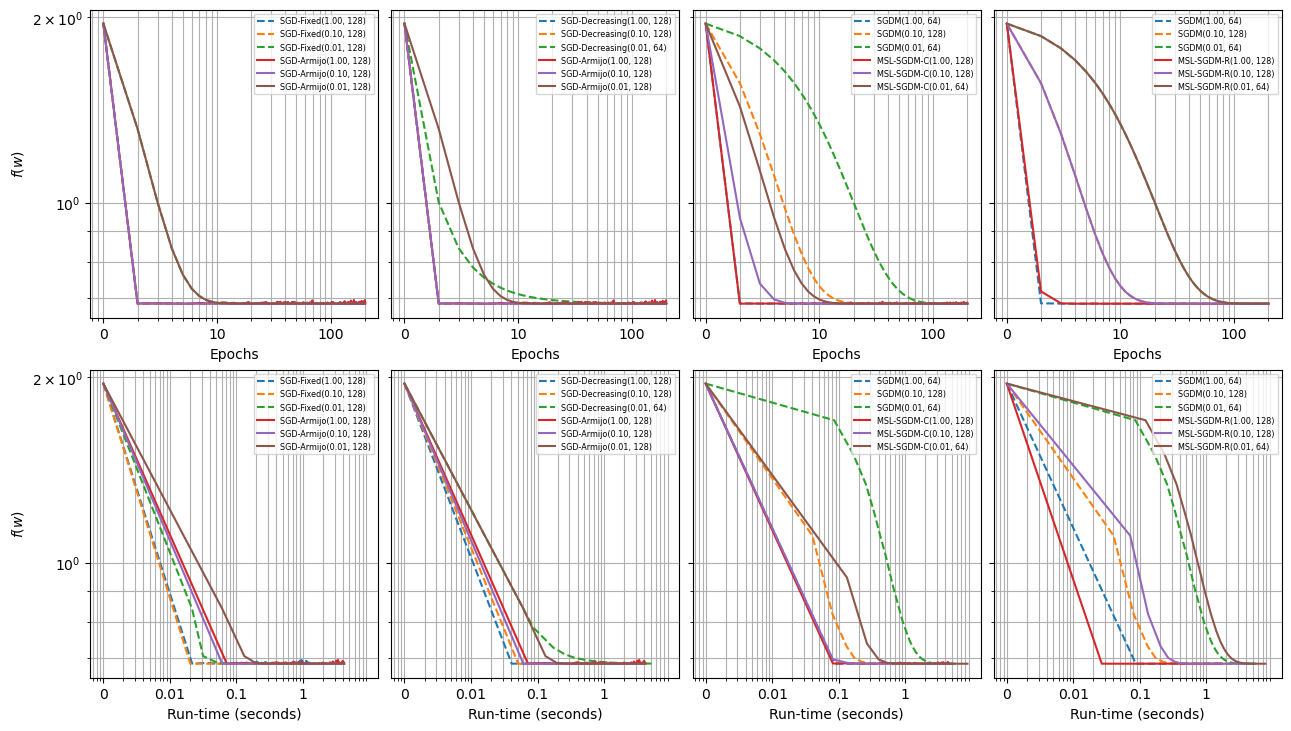

In [44]:
diagnostic([sgdfixed_phish, sgddecre_phish, sgdm_phish, sgdarmijo_phish, mslc_phish, mslr_phish])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [45]:
data_a2a = load_a2a()
data_info(data_a2a)

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Train distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}
Test distribution: {-1.0: 0.7600673356218642, 1.0: 0.23993266437813573}


In [46]:
Ma2a_grid = (32, 64)
for i in Ma2a_grid:
    print(f"Iterations: {data_a2a[1].size / i}")

Iterations: 70.78125
Iterations: 35.390625


## Benchmark

In [47]:
bencha2a = run_bench(data_a2a, C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [48]:
batchfixed_a2a1, _ = grid_search("SGD-Fixed", C, data_a2a, (data_a2a[1].size,), sgd_steps)

{'batch': 2265, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 1.984586
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.8223857935040929
Objective function: 0.594416
Grad norm: 0.363976
Sol norm: 0.355752
Run-time (seconds): 0.227324
Epochs: 600


In [49]:
sgdfixed_a2a1, _ = grid_search("SGD-Fixed", C, data_a2a, Ma2a_grid, sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search("SGD-Decreasing", C, data_a2a, Ma2a_grid, sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search("SGDM", C, data_a2a, Ma2a_grid, sgd_steps)

{'batch': 32, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 11.659651
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.8071362556113019
Objective function: 0.602741
Grad norm: 0.356183
Sol norm: 0.425177
Run-time (seconds): 6.129650
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 0.158, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 9.428701
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.7602653815685239
Objective function: 0.564027
Grad norm: 0.000558
Sol norm: 0.438900
Run-time (seconds): 0.127937
Epochs: 16
% ------- %
{'batch': 64, 'alpha': 0.12, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 19.886666
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.7602983892263006
Objective function: 0.564031
Grad norm: 0.003028
Sol norm: 0.438406
Run-time (seconds): 4.630771
Epochs: 600


In [50]:
sgdarmijo_a2a1, _ = grid_search("SGD-Armijo", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ------- %")
mslc_a2a1, _ = grid_search("MSL-SGDM-C", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ------- %")
mslr_a2a1, _ = grid_search("MSL-SGDM-R", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 32, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 47.397742
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.8071362556113019
Objective function: 0.602741
Grad norm: 0.356183
Sol norm: 0.425177
Run-time (seconds): 17.498292
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.3}
Grid search run-time (seconds): 134.121279
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.7663057829416424
Objective function: 0.572816
Grad norm: 0.113219
Sol norm: 0.469357
Run-time (seconds): 15.462552
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 56.371019
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.762179825719567
Objective function: 0.565187
Grad norm: 0.057688
Sol norm: 0.437002
Run-time (seconds): 16.014220
Epochs: 600


In [51]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2265.0,1.000,0.0,0.594416,0.363976,0.227324,600,0.805740,0.822386,0.661688,0.678397,0.355752
4,SGD-Fixed,0.5,32.0,1.000,0.0,0.602741,0.356183,6.129650,600,0.788079,0.807136,0.640035,0.659046,0.425177
7,SGD-Armijo,0.5,32.0,1.000,0.0,0.602741,0.356183,17.498292,600,0.788079,0.807136,0.640035,0.659046,0.425177
8,MSL-SGDM-C,0.5,32.0,1.000,0.9,0.572816,0.113219,15.462552,600,0.755850,0.766306,0.516608,0.513706,0.469357
9,MSL-SGDM-R,0.5,32.0,1.000,0.9,0.565187,0.057688,16.014220,600,0.751435,0.762180,0.508446,0.504543,0.437002
6,SGDM,0.5,64.0,0.120,0.9,0.564031,0.003028,4.630771,600,0.748344,0.760298,0.501748,0.500481,0.438406
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
5,SGD-Decreasing,0.5,64.0,0.158,0.0,0.564027,0.000558,0.127937,16,0.748344,0.760265,0.501748,0.500413,0.438900


In [52]:
print(test_a2a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Fixed & 600 & 0.227324 & 0.355752 & 0.594416 & 0.363976 & 0.822386 \\
SGD-Fixed & 600 & 6.129650 & 0.425177 & 0.602741 & 0.356183 & 0.807136 \\
SGD-Armijo & 600 & 17.498292 & 0.425177 & 0.602741 & 0.356183 & 0.807136 \\
MSL-SGDM-C & 600 & 15.462552 & 0.469357 & 0.572816 & 0.113219 & 0.766306 \\
MSL-SGDM-R & 600 & 16.014220 & 0.437002 & 0.565187 & 0.057688 & 0.762180 \\
SGDM & 600 & 4.630771 & 0.438406 & 0.564031 & 0.003028 & 0.760298 \\
Newton-CG & 5 & NaN & 0.438972 & 0.564027 & 0.000004 & 0.760265 \\
CG & 12 & NaN & 0.438961 & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & 8 & NaN & 0.438969 & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 16 & 0.127937 & 0.438900 & 0.564027 & 0.000558 & 0.760265 \\
\bottomrule
\end{tabular}



## SGD

In [53]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, (data_a2a[1].size,))

Grid search run-time (seconds): 2.951082


In [54]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, Ma2a_grid)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, data_a2a, Ma2a_grid)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, data_a2a, Ma2a_grid)

Grid search run-time (seconds): 3.479353
Grid search run-time (seconds): 5.347990
Grid search run-time (seconds): 8.470727


In [55]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, data_a2a, Ma2a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, data_a2a, Ma2a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, data_a2a, Ma2a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 28.793220
Grid search run-time (seconds): 25.093978
Grid search run-time (seconds): 19.366316


In [56]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [57]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2265.0,1.00,0.0,0.594416,0.363976,0.071923,200,0.805740,0.822386,0.661688,0.678397,0.355752
18,MSL-SGDM-C,0.5,32.0,1.00,0.9,0.601979,0.387929,1.817897,200,0.797792,0.816774,0.666211,0.691087,0.380605
6,SGD-Fixed,0.5,64.0,1.00,0.0,0.581650,0.245977,0.545053,200,0.779249,0.788322,0.571040,0.569989,0.405534
15,SGD-Armijo,0.5,64.0,1.00,0.0,0.575131,0.180009,1.974050,200,0.766446,0.775680,0.539903,0.535407,0.419199
21,MSL-SGDM-R,0.5,32.0,1.00,0.9,0.565050,0.049609,1.467879,200,0.747903,0.760860,0.501453,0.501745,0.438246
12,SGDM,0.5,32.0,1.00,0.9,0.564445,0.026860,2.713866,200,0.748344,0.760529,0.501748,0.501057,0.439078
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,1.029569,200,0.748344,0.760331,0.501748,0.500597,0.436755
16,SGD-Armijo,0.5,32.0,0.10,0.0,0.564559,0.025339,3.717898,200,0.748344,0.760331,0.501748,0.500597,0.436755
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961


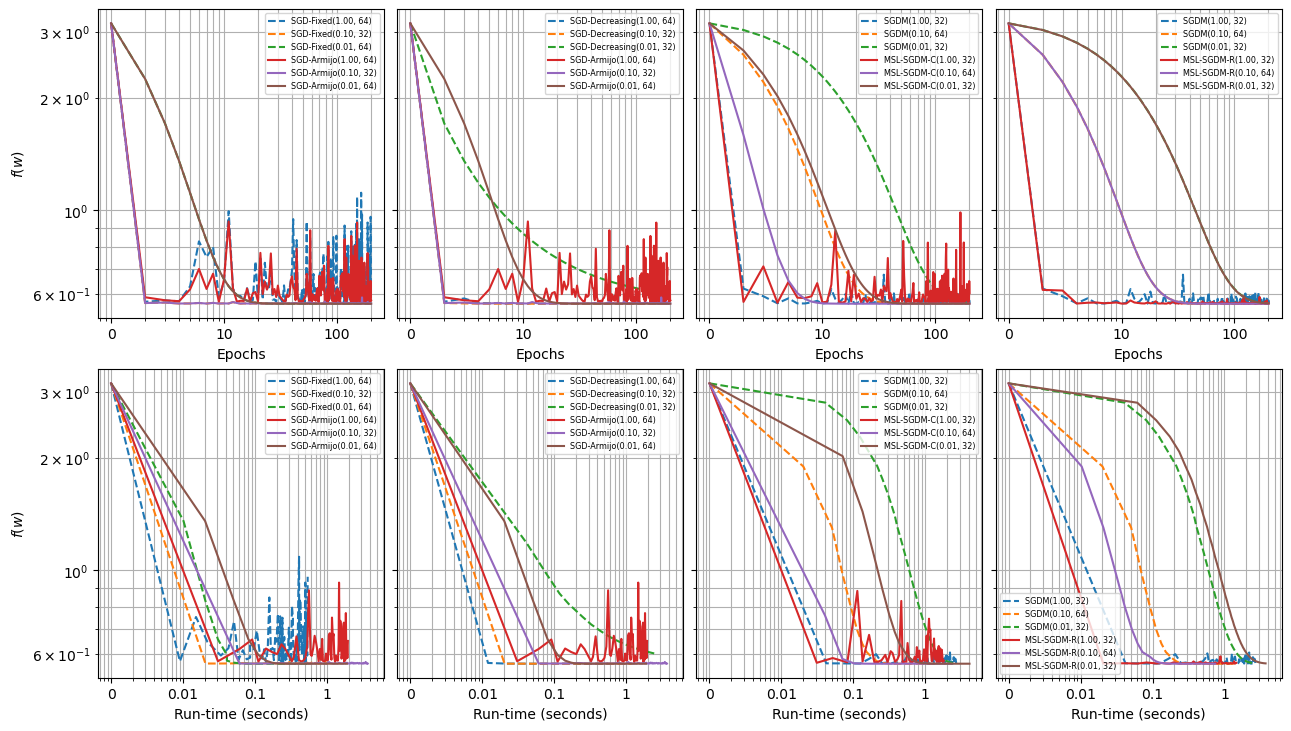

In [58]:
diagnostic([sgdfixed_a2a, sgddecre_a2a, sgdm_a2a, sgdarmijo_a2a, mslc_a2a, mslr_a2a]),
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [59]:
data_mush = load_mushrooms()
data_info(data_mush)

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Train distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
Test distribution: {-1: 0.48123076923076924, 1: 0.5187692307692308}


In [60]:
Mmush_grid = (64, 128)
for i in Mmush_grid:
    print(f"Iterations: {data_mush[1].size / i}")

Iterations: 101.546875
Iterations: 50.7734375


## Benchmark

In [61]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [62]:
batchfixed_mush1, _ = grid_search("SGD-Fixed", C, data_mush, (data_mush[1].size,), sgd_steps)

{'batch': 6499, 'alpha': 0.589, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 3.005024
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000715
Sol norm: 0.635907
Run-time (seconds): 0.051342
Epochs: 22


In [63]:
sgdfixed_mush1, _ = grid_search("SGD-Fixed", C, data_mush, Mmush_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_mush1, _ = grid_search("SGD-Decreasing", C, data_mush, Mmush_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_mush1, _ = grid_search("SGDM", C, data_mush, Mmush_grid, sgd_steps, n_jobs=8)

{'batch': 128, 'alpha': 0.589, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 23.508170
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.9526153846153846
Objective function: 0.540091
Grad norm: 0.352040
Sol norm: 0.658069
Run-time (seconds): 7.842358
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.251, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 13.843374
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.8935384615384615
Objective function: 0.517727
Grad norm: 0.000622
Sol norm: 0.636020
Run-time (seconds): 0.321285
Epochs: 24
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 24.009679
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.9243076923076923
Objective function: 0.557069
Grad norm: 0.479065
Sol norm: 0.658660
Run-time (seconds): 7.560532
Epochs: 600


In [64]:
sgdarmijo_mush1, _ = grid_search("SGD-Armijo", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=11)
print("% ----- %")
mslc_mush1, _ = grid_search("MSL-SGDM-C", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=11)
print("% ----- %")
mslr_mush1, _ = grid_search("MSL-SGDM-R", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=11)

{'batch': 128, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 70.569884
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.9372307692307692
Objective function: 0.532477
Grad norm: 0.274342
Sol norm: 0.649190
Run-time (seconds): 11.640571
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.5}
Grid search run-time (seconds): 196.280169
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.9396923076923077
Objective function: 0.549957
Grad norm: 0.430947
Sol norm: 0.662476
Run-time (seconds): 14.078628
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 80.421546
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.9556923076923077
Objective function: 0.535764
Grad norm: 0.323858
Sol norm: 0.640720
Run-time (seconds): 12.211899
Epochs: 600


In [65]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
9,MSL-SGDM-R,0.5,128.0,1.000,0.9,0.535764,0.323858,12.211899,600,0.963379,0.955692,0.963847,0.956463,0.640720
4,SGD-Fixed,0.5,128.0,0.589,0.0,0.540091,0.352040,7.842358,600,0.960455,0.952615,0.960893,0.953312,0.658069
8,MSL-SGDM-C,0.5,128.0,1.000,0.9,0.549957,0.430947,14.078628,600,0.949685,0.939692,0.950700,0.941180,0.662476
7,SGD-Armijo,0.5,128.0,1.000,0.0,0.532477,0.274342,11.640571,600,0.947838,0.937231,0.947197,0.936587,0.649190
6,SGDM,0.5,128.0,1.000,0.9,0.557069,0.479065,7.560532,600,0.935990,0.924308,0.937475,0.926352,0.658660
5,SGD-Decreasing,0.5,128.0,0.251,0.0,0.517727,0.000622,0.321285,24,0.895522,0.893538,0.892406,0.890219,0.636020
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
3,SGD-Fixed,0.5,6499.0,0.589,0.0,0.517727,0.000715,0.051342,22,0.895522,0.892923,0.892406,0.889580,0.635907


In [66]:
print(test_mush[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
MSL-SGDM-R & 600 & 12.211899 & 0.640720 & 0.535764 & 0.323858 & 0.955692 \\
SGD-Fixed & 600 & 7.842358 & 0.658069 & 0.540091 & 0.352040 & 0.952615 \\
MSL-SGDM-C & 600 & 14.078628 & 0.662476 & 0.549957 & 0.430947 & 0.939692 \\
SGD-Armijo & 600 & 11.640571 & 0.649190 & 0.532477 & 0.274342 & 0.937231 \\
SGDM & 600 & 7.560532 & 0.658660 & 0.557069 & 0.479065 & 0.924308 \\
SGD-Decreasing & 24 & 0.321285 & 0.636020 & 0.517727 & 0.000622 & 0.893538 \\
Newton-CG & 7 & NaN & 0.635933 & 0.517726 & 0.000003 & 0.892923 \\
CG & 11 & NaN & 0.635939 & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & 10 & NaN & 0.635930 & 0.517726 & 0.000017 & 0.892923 \\
SGD-Fixed & 22 & 0.051342 & 0.635907 & 0.517727 & 0.000715 & 0.892923 \\
\bottomrule
\end{tabular}



## SGD

In [67]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, (data_mush[1].size,))

Grid search run-time (seconds): 3.230356


In [68]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, Mmush_grid)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, Mmush_grid)
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, Mmush_grid)

Grid search run-time (seconds): 5.024112
Grid search run-time (seconds): 12.118656
Grid search run-time (seconds): 12.471805


In [69]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, Mmush_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, Mmush_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, Mmush_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 44.792085
Grid search run-time (seconds): 44.073459
Grid search run-time (seconds): 35.066886


In [70]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [71]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
15,SGD-Armijo,0.5,64.0,1.00,0.0,0.537647,0.301845,6.139609,200,0.966303,0.957538,0.966484,0.958149,0.635872
18,MSL-SGDM-C,0.5,128.0,1.00,0.9,0.534098,0.305902,1.563159,200,0.959224,0.953231,0.959288,0.953535,0.650550
21,MSL-SGDM-R,0.5,128.0,1.00,0.9,0.533143,0.300404,1.256642,200,0.959994,0.952615,0.960086,0.952803,0.642598
7,SGD-Fixed,0.5,64.0,0.10,0.0,0.518925,0.076580,1.539535,200,0.904447,0.899077,0.901736,0.896159,0.642903
16,SGD-Armijo,0.5,64.0,0.10,0.0,0.518925,0.076580,5.643967,200,0.904447,0.899077,0.901736,0.896159,0.642903
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,2.223989,200,0.898292,0.897231,0.895332,0.894055,0.637874
19,MSL-SGDM-C,0.5,64.0,0.10,0.9,0.518045,0.035845,6.626375,200,0.897677,0.896000,0.894694,0.892823,0.641153
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,2.150925,200,0.896138,0.894769,0.893077,0.891498,0.635850
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.517727,0.001390,3.188228,200,0.895676,0.893538,0.892565,0.890219,0.635928
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933


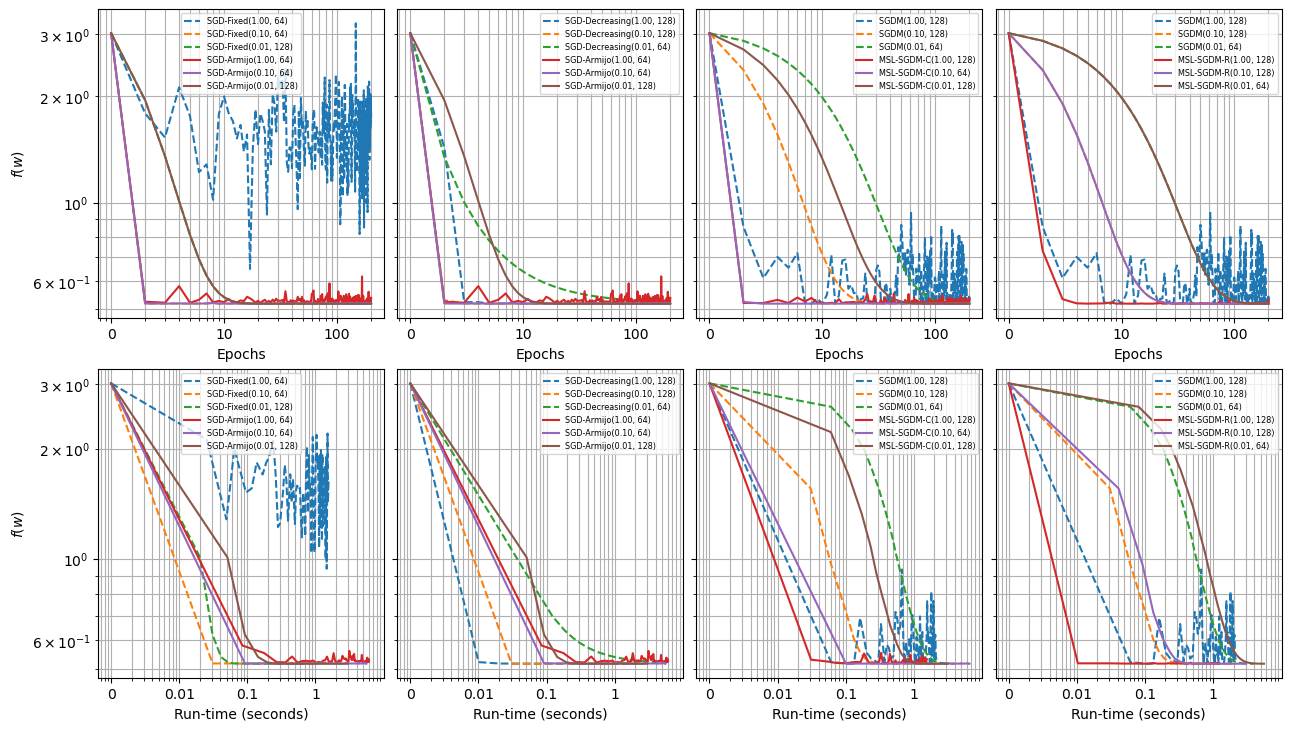

In [72]:
diagnostic([sgdfixed_mush, sgddecre_mush, sgdm_mush, sgdarmijo_mush, mslc_mush, mslr_mush]),
plt.savefig("./plots/mush-diagnostic.pdf")

# a4a

In [73]:
data_a4a = load_a4a()
data_info(data_a4a)

X_train = (4781, 120), y_train = (4781,)
X_test = (27780, 120), y_test = (27780,)
Train distribution: {-1.0: 0.7515164191591717, 1.0: 0.24848358084082828}
Test distribution: {-1.0: 0.7605111591072714, 1.0: 0.2394888408927286}


In [74]:
Ma4a_grid = (64, 128)
for i in Ma4a_grid:
    print(f"Iterations: {data_a4a[1].size / i}")

Iterations: 74.703125
Iterations: 37.3515625


## Benchmark

In [75]:
bencha4a = run_bench(data_a4a, C)

bencha4a_data = optim_bench(bencha4a)

## Fine-tuning

In [76]:
batchfixed_a4a1, _ = grid_search("SGD-Fixed", C, load_a4a(), (data_a4a[1].size,), sgd_steps)

{'batch': 4781, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.199985
Number of combinations analyzed: 11
-----
Solver: SGD-Fixed
Test score: 0.8095752339812815
Objective function: 0.579971
Grad norm: 0.300459
Sol norm: 0.376931
Run-time (seconds): 0.364886
Epochs: 600


In [77]:
sgdfixed_a4a1, _ = grid_search("SGD-Fixed", C, data_a4a, Ma4a_grid, sgd_steps)
print("% ----- %")
sgddecre_a4a1, _ = grid_search("SGD-Decreasing", C, data_a4a, Ma4a_grid, sgdd_steps)
print("% ----- %")
sgdm_a4a1, _ = grid_search("SGDM", C, data_a4a, Ma4a_grid, sgd_steps)

{'batch': 128, 'alpha': 0.589, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 14.251249
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.7658027357811376
Objective function: 0.565419
Grad norm: 0.153369
Sol norm: 0.395049
Run-time (seconds): 5.074336
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.251, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 10.334261
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.7607271418286538
Objective function: 0.558973
Grad norm: 0.000438
Sol norm: 0.450215
Run-time (seconds): 0.211525
Epochs: 22
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 20.315408
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.7625629949604031
Objective function: 0.561335
Grad norm: 0.098128
Sol norm: 0.418721
Run-time (seconds): 5.143106
Epochs: 600


In [78]:
sgdarmijo_a4a1, _ = grid_search("SGD-Armijo", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, n_jobs=12)
print("% ----- %")
mslc_a4a1, _ = grid_search("MSL-SGDM-C", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=12)
print("% ----- %")
mslr_a4a1, _ = grid_search("MSL-SGDM-R", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, n_jobs=12)

{'batch': 64, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.3, 'delta_m': 0.0}
Grid search run-time (seconds): 44.351062
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.8219942404607632
Objective function: 0.593850
Grad norm: 0.365189
Sol norm: 0.428088
Run-time (seconds): 17.620147
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.3}
Grid search run-time (seconds): 140.889524
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.8248740100791937
Objective function: 0.598331
Grad norm: 0.410147
Sol norm: 0.349105
Run-time (seconds): 11.247278
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 60.325289
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.7607991360691144
Objective function: 0.559157
Grad norm: 0.020083
Sol norm: 0.443224
Run-time (seconds): 10.051174
Epochs: 600


In [79]:
fine_a4a_data = optim_data([batchfixed_a4a1, sgdfixed_a4a1, sgddecre_a4a1, sgdm_a4a1, sgdarmijo_a4a1, mslc_a4a1, mslr_a4a1])

test_a4a = models_summary(fine_a4a_data, bencha4a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a4a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
8,MSL-SGDM-C,0.5,128.0,1.000,0.9,0.598331,0.410147,11.247278,600,0.817402,0.824874,0.697370,0.699816,0.349105
7,SGD-Armijo,0.5,64.0,1.000,0.0,0.593850,0.365189,17.620147,600,0.818030,0.821994,0.693844,0.691436,0.428088
3,SGD-Fixed,0.5,4781.0,1.000,0.0,0.579971,0.300459,0.364886,600,0.801506,0.809575,0.621718,0.625296,0.376931
4,SGD-Fixed,0.5,128.0,0.589,0.0,0.565419,0.153369,5.074336,600,0.758419,0.765803,0.514171,0.511717,0.395049
6,SGDM,0.5,128.0,1.000,0.9,0.561335,0.098128,5.143106,600,0.754026,0.762563,0.505332,0.504490,0.418721
9,MSL-SGDM-R,0.5,128.0,1.000,0.9,0.559157,0.020083,10.051174,600,0.752144,0.760799,0.501263,0.500653,0.443224
1,Newton-CG,0.5,NaN,NaN,NaN,0.558973,0.000003,NaN,5,0.752144,0.760727,0.501263,0.500451,0.450068
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.558973,0.000011,NaN,8,0.752144,0.760727,0.501263,0.500451,0.450067
2,CG,0.5,NaN,NaN,NaN,0.558973,0.000020,NaN,12,0.752144,0.760727,0.501263,0.500451,0.450062
5,SGD-Decreasing,0.5,128.0,0.251,0.0,0.558973,0.000438,0.211525,22,0.752144,0.760727,0.501263,0.500451,0.450215


In [80]:
print(test_a4a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
MSL-SGDM-C & 600 & 11.247278 & 0.349105 & 0.598331 & 0.410147 & 0.824874 \\
SGD-Armijo & 600 & 17.620147 & 0.428088 & 0.593850 & 0.365189 & 0.821994 \\
SGD-Fixed & 600 & 0.364886 & 0.376931 & 0.579971 & 0.300459 & 0.809575 \\
SGD-Fixed & 600 & 5.074336 & 0.395049 & 0.565419 & 0.153369 & 0.765803 \\
SGDM & 600 & 5.143106 & 0.418721 & 0.561335 & 0.098128 & 0.762563 \\
MSL-SGDM-R & 600 & 10.051174 & 0.443224 & 0.559157 & 0.020083 & 0.760799 \\
Newton-CG & 5 & NaN & 0.450068 & 0.558973 & 0.000003 & 0.760727 \\
L-BFGS-B & 8 & NaN & 0.450067 & 0.558973 & 0.000011 & 0.760727 \\
CG & 12 & NaN & 0.450062 & 0.558973 & 0.000020 & 0.760727 \\
SGD-Decreasing & 22 & 0.211525 & 0.450215 & 0.558973 & 0.000438 & 0.760727 \\
\bottomrule
\end{tabular}



## SGD

In [81]:
# BatchGD-Fixed
batchfixed_a4a = run_solvers("SGD-Fixed", C, data_a4a, (data_a4a[1].size,))

Grid search run-time (seconds): 3.063489


In [82]:
# SGD-Fixed
sgdfixed_a4a = run_solvers("SGD-Fixed", C, data_a4a, Ma4a_grid)
# SGD-Decreasing
sgddecre_a4a = run_solvers("SGD-Decreasing", C, data_a4a, Ma4a_grid)
# SGDM
sgdm_a4a = run_solvers("SGDM", C, data_a4a, Ma4a_grid)

Grid search run-time (seconds): 3.737437
Grid search run-time (seconds): 6.470533
Grid search run-time (seconds): 9.148982


In [83]:
# SGD-Armijo
sgdarmijo_a4a = run_solvers("SGD-Armijo", C, data_a4a, Ma4a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_a4a = run_solvers("MSL-SGDM-C", C, data_a4a, Ma4a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_a4a = run_solvers("MSL-SGDM-R", C, data_a4a, Ma4a_grid, delta=armijo_damps)

Grid search run-time (seconds): 31.434569
Grid search run-time (seconds): 28.136963
Grid search run-time (seconds): 6.495559


In [84]:
modelsa4a_data = optim_data(batchfixed_a4a + sgdfixed_a4a + sgddecre_a4a + sgdm_a4a + sgdarmijo_a4a + mslc_a4a + mslr_a4a)

## Summary

In [85]:
models_summary(modelsa4a_data, bencha4a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
18,MSL-SGDM-C,0.5,64.0,1.00,0.9,0.593457,0.369774,1.959076,200,0.819703,0.824334,0.688196,0.687053,0.402941
15,SGD-Armijo,0.5,64.0,1.00,0.0,0.609413,0.444574,4.119123,200,0.813846,0.818647,0.738952,0.737890,0.405267
3,SGD-Fixed,0.5,4781.0,1.00,0.0,0.579972,0.300464,0.096760,200,0.801506,0.809575,0.621718,0.625296,0.376930
6,SGD-Fixed,0.5,64.0,1.00,0.0,0.621834,0.502280,1.129140,200,0.796068,0.794708,0.771635,0.762982,0.404200
21,MSL-SGDM-R,0.5,64.0,1.00,0.9,0.559310,0.026266,1.629534,200,0.752144,0.760943,0.501263,0.501005,0.449810
7,SGD-Fixed,0.5,64.0,0.10,0.0,0.559311,0.019704,1.096711,200,0.752144,0.760763,0.501263,0.500526,0.450878
16,SGD-Armijo,0.5,64.0,0.10,0.0,0.559311,0.019704,4.099647,200,0.752144,0.760763,0.501263,0.500526,0.450878
1,Newton-CG,0.5,NaN,NaN,NaN,0.558973,0.000003,NaN,5,0.752144,0.760727,0.501263,0.500451,0.450068
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.558973,0.000011,NaN,8,0.752144,0.760727,0.501263,0.500451,0.450067
2,CG,0.5,NaN,NaN,NaN,0.558973,0.000020,NaN,12,0.752144,0.760727,0.501263,0.500451,0.450062


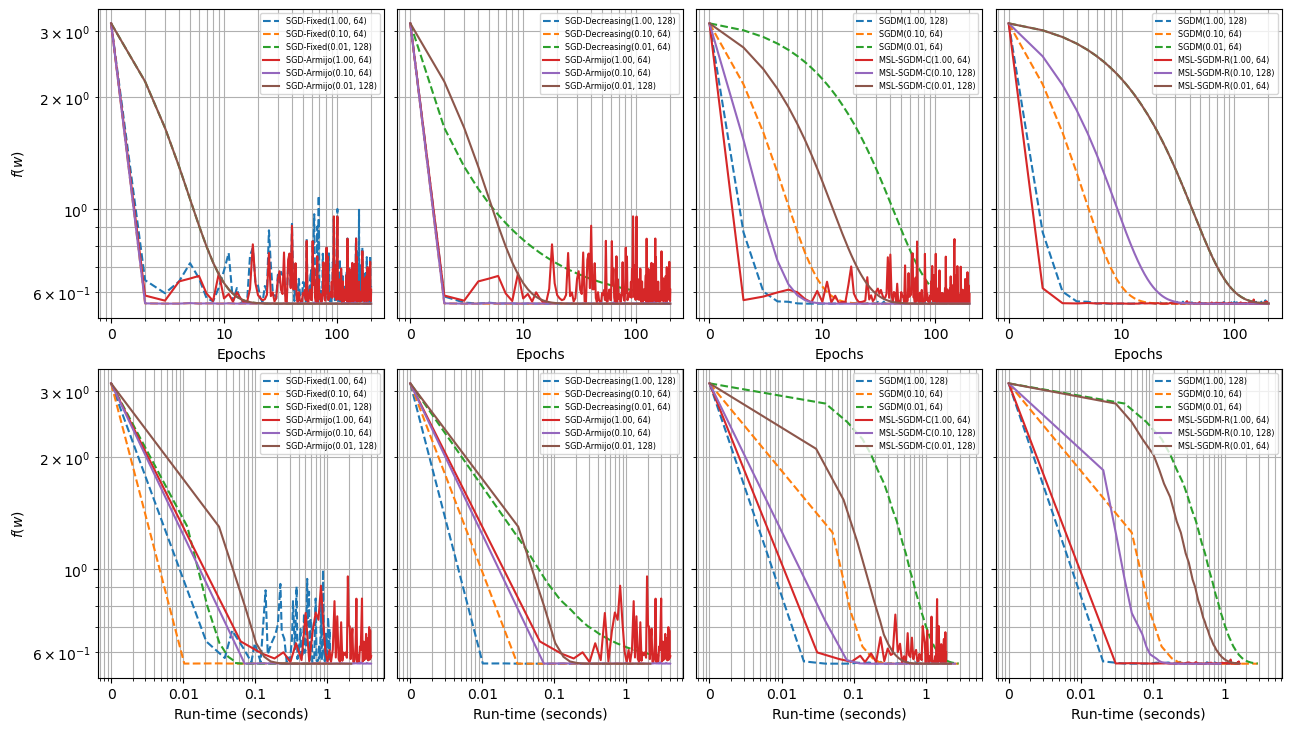

In [86]:
diagnostic([sgdfixed_a4a, sgddecre_a4a, sgdm_a4a, sgdarmijo_a4a, mslc_a4a, mslr_a4a]),
plt.savefig("./plots/a4a-diagnostic.pdf")